In [3]:
import matplotlib.pyplot as plt
import sacc
import numpy as np

In [4]:
#path = '../../TXPipe/data/cosmodc2/outputs_redmagic/no_shape_noise/2021_Jan21/'
#file_real = 'twopoint_data_real.sacc'

path = '/Users/juditprat/Downloads/'
file_real = 'twopoint_data_real_noshapenoise_sourcecolorbinning.sacc'

In [5]:
s = sacc.Sacc.load_fits(path + file_real)

In [6]:
nzs_l = []
nzs_s = []
for tracername in s.tracers:
    tracer = s.get_tracer(tracername)
    if 'lens' in tracername:
        z_l = tracer.z
        nzs_l.append(tracer.nz)
    if 'source' in tracername:
        z_s = tracer.z
        nzs_s.append(tracer.nz)

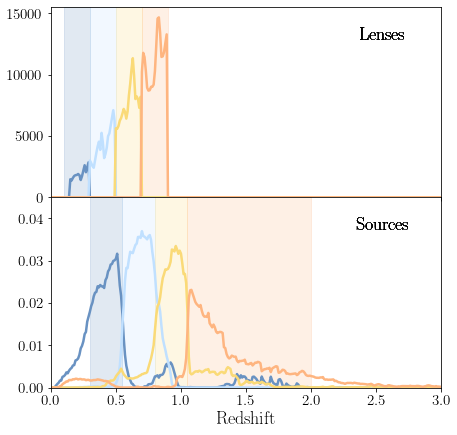

In [9]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig, ax = plt.subplots(2, 1, figsize=(7, 7), sharey=False, sharex=True)
plt.subplots_adjust(hspace = 0.0, wspace = 0)
#c = ["#FEB580", "#FADA77","#C0E0FF","#6992C2","#474747"]
c = ["#6992C2", "#C0E0FF", "#FADA77", "#FEB580"]
zbins_l = [0.1, 0.3, 0.5, 0.7, 0.9] 
zbins_s = [0.3, 0.55, 0.8, 1.05, 2.]
fs = 15
#plt.xticks(fontsize = fs)
#plt.yticks(fontsize = fs)

plt.rc('xtick',labelsize=fs)
plt.rc('ytick',labelsize=fs)

#ax[0].tick_params(axis='x', Labelsize= fs)

for i,nz in enumerate(nzs_l):
    ax[0].plot(z_l, nz, color = c[i], lw = 2.5)
    ax[0].set_ylim(ymin=0, ymax = 15500)
    ax[0].set_xlim(xmin=0, xmax = 3.)
    ax[0].text(0.85, 0.85, "Lenses", horizontalalignment='center',
                              verticalalignment='center', transform=ax[0].transAxes, fontsize=18)
    ax[0].axvspan(zbins_l[i], zbins_l[i+1], color = c[i], alpha = 0.2)
    

for i,nz in enumerate(nzs_s):
    ax[1].plot(z_s, nz, color = c[i], lw = 2.5)
    ax[1].set_ylim(ymin=0, ymax = 0.045)
    ax[1].set_xlabel('Redshift', fontsize=18)
    ax[1].text(0.85, 0.85, "Sources", horizontalalignment='center',
                              verticalalignment='center', transform=ax[1].transAxes, fontsize=18)
    ax[1].axvspan(zbins_s[i], zbins_s[i+1], color = c[i], alpha = 0.2)

plt.savefig('../plots/nzs.png', pad_inches = 0.1)
plt.savefig('../plots/nzs.pdf', pad_inches = 0.1)